In [1]:
import requests
import pandas as pd


api_key = 'MyAPI'

# Base URL
base_url = 'http://api.openweathermap.org/data/2.5/weather?'

# City name
city_name = 'Berlin'

# Complete URL
complete_url = f'{base_url}q={city_name}&appid={api_key}'

# Get the response
response = requests.get(complete_url)

# Check the status code of the response
if response.status_code == 200:
    # Get data in JSON format
    data = response.json()

    # Extracting relevant information
    weather_data = {
        'City': data['name'],
        'Temperature (K)': data['main']['temp'],
        'Feels Like (K)': data['main']['feels_like'],
        'Min Temperature (K)': data['main']['temp_min'],
        'Max Temperature (K)': data['main']['temp_max'],
        'Pressure (hPa)': data['main']['pressure'],
        'Humidity (%)': data['main']['humidity'],
        'Weather Description': data['weather'][0]['description'],
        'Wind Speed (m/s)': data['wind']['speed'],
        'Wind Direction (degrees)': data['wind']['deg'],
        'Cloudiness (%)': data['clouds']['all'],
        'Country': data['sys']['country'],
        'Sunrise': data['sys']['sunrise'],
        'Sunset': data['sys']['sunset']
    }

    # Creating a DataFrame
    df = pd.DataFrame([weather_data])
    print(df)

    # Optionally, save the DataFrame to a CSV file
    df.to_csv('weather_data1.csv', index=False)
else:
    print(f'Error in the HTTP request: Status Code {response.status_code}')
    print(f'Response Content: {response.content}')




     City  Temperature (K)  Feels Like (K)  Min Temperature (K)  \
0  Berlin           298.37          298.17               295.93   

   Max Temperature (K)  Pressure (hPa)  Humidity (%) Weather Description  \
0               300.36            1010            47           clear sky   

   Wind Speed (m/s)  Wind Direction (degrees)  Cloudiness (%) Country  \
0              1.54                         0               0      DE   

      Sunrise      Sunset  
0  1719197040  1719257613  


In [2]:
df['Temperature (C)'] = df['Temperature (K)'] - 273.15
df['Feels Like (C)'] = df['Feels Like (K)'] - 273.15
df['Min Temperature (C)'] = df['Min Temperature (K)'] - 273.15
df['Max Temperature (C)'] = df['Max Temperature (K)'] - 273.15


In [3]:
df

,City,Temperature (K),Feels Like (K),Min Temperature (K),Max Temperature (K),Pressure (hPa),Humidity (%),Weather Description,Wind Speed (m/s),Wind Direction (degrees),Cloudiness (%),Country,Sunrise,Sunset,Temperature (C),Feels Like (C),Min Temperature (C),Max Temperature (C)
0,Berlin,298.37,298.17,295.93,300.36,1010,47,clear sky,1.54,0,0,DE,1719197040,1719257613,25.22,25.02,22.78,27.21


In [4]:
df['Sunrise'] = pd.to_datetime(df['Sunrise'], unit='s')
df['Sunset'] = pd.to_datetime(df['Sunset'], unit='s')
df['Daylight Duration'] = df['Sunset'] - df['Sunrise']


In [5]:
df

,City,Temperature (K),Feels Like (K),Min Temperature (K),Max Temperature (K),Pressure (hPa),Humidity (%),Weather Description,Wind Speed (m/s),Wind Direction (degrees),Cloudiness (%),Country,Sunrise,Sunset,Temperature (C),Feels Like (C),Min Temperature (C),Max Temperature (C),Daylight Duration
0,Berlin,298.37,298.17,295.93,300.36,1010,47,clear sky,1.54,0,0,DE,2024-06-24 02:44:00,2024-06-24 19:33:33,25.22,25.02,22.78,27.21,0 days 16:49:33


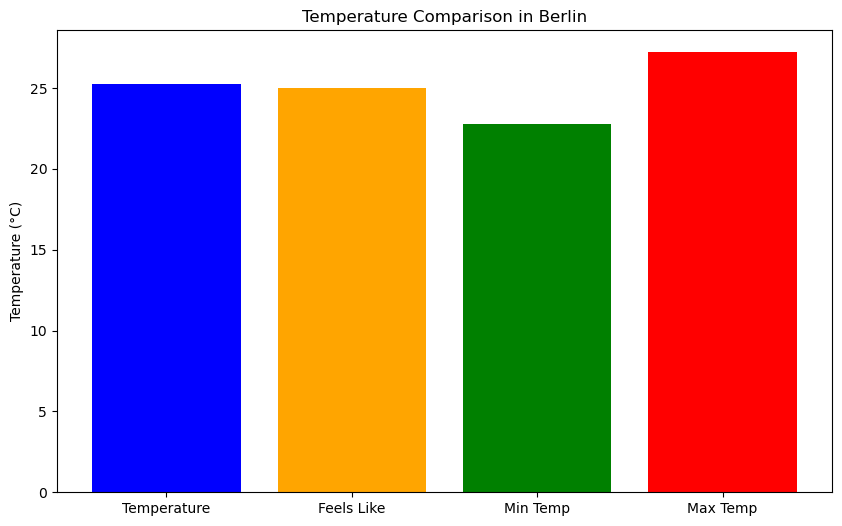

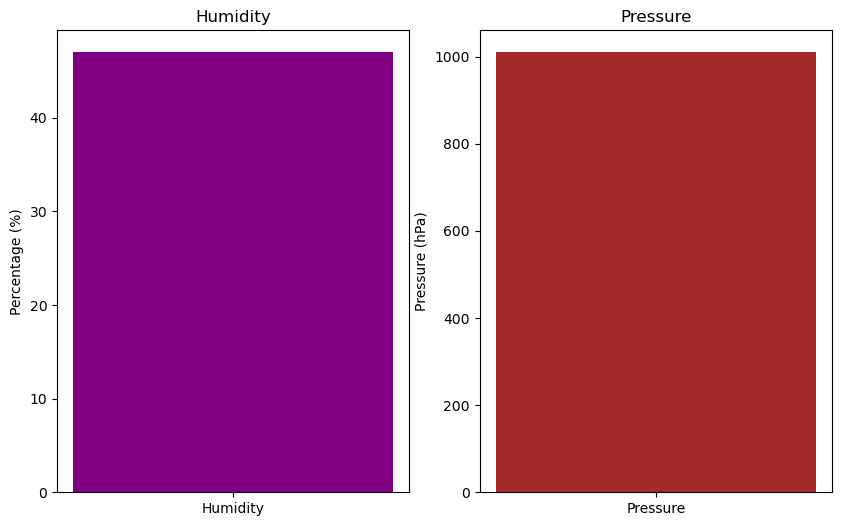

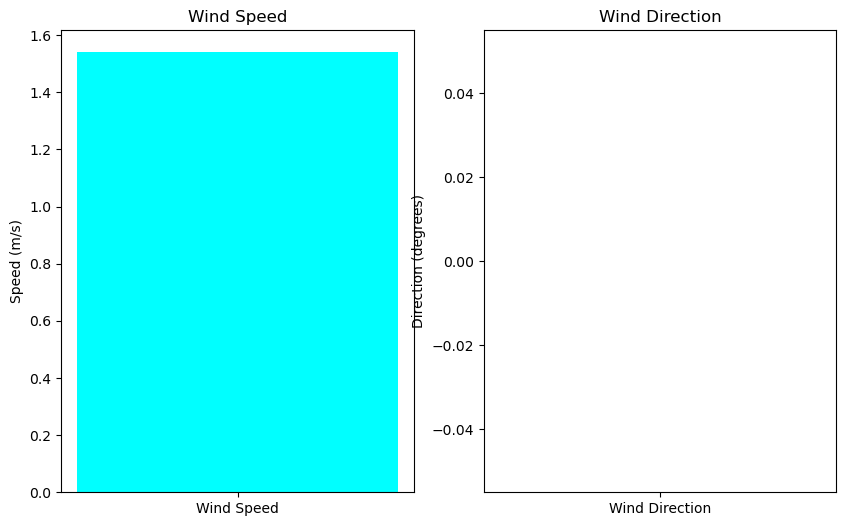

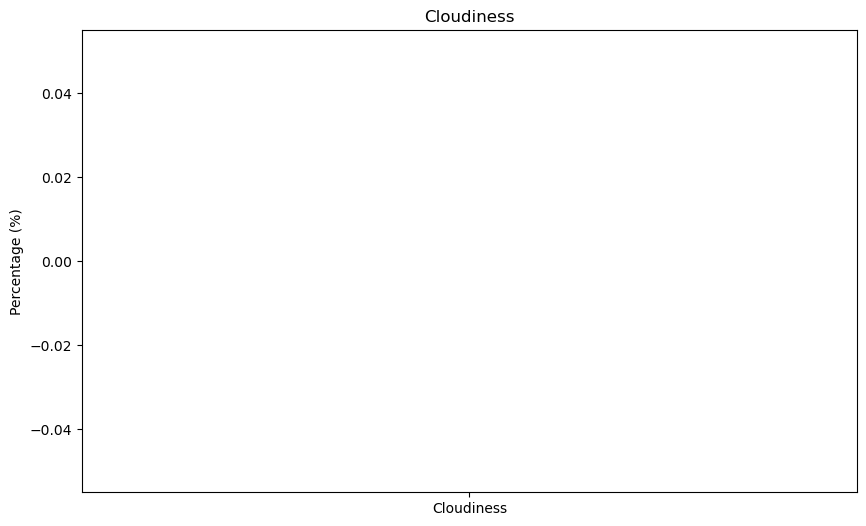

In [6]:
import matplotlib.pyplot as plt

city = df['City'][0]
temperature = df['Temperature (K)'][0] - 273.15  # Convert to Celsius
feels_like = df['Feels Like (K)'][0] - 273.15  # ""
temp_min = df['Min Temperature (K)'][0] - 273.15  # ""
temp_max = df['Max Temperature (K)'][0] - 273.15  #""
humidity = df['Humidity (%)'][0]
pressure = df['Pressure (hPa)'][0]
wind_speed = df['Wind Speed (m/s)'][0]
wind_direction = df['Wind Direction (degrees)'][0]
cloudiness = df['Cloudiness (%)'][0]

# Plotting Temperature Comparison
plt.figure(figsize=(10, 6))
temp_labels = ['Temperature', 'Feels Like', 'Min Temp', 'Max Temp']
temp_values = [temperature, feels_like, temp_min, temp_max]
plt.bar(temp_labels, temp_values, color=['blue', 'orange', 'green', 'red'])
plt.ylabel('Temperature (°C)')
plt.title(f'Temperature Comparison in {city}')
plt.show()

# Plotting Humidity and Pressure
plt.figure(figsize=(10, 6))
plt.subplot(1, 2, 1)
plt.bar(['Humidity'], [humidity], color='purple')
plt.ylabel('Percentage (%)')
plt.title('Humidity')

plt.subplot(1, 2, 2)
plt.bar(['Pressure'], [pressure], color='brown')
plt.ylabel('Pressure (hPa)')
plt.title('Pressure')
plt.show()

# Plotting Wind Speed and Direction
plt.figure(figsize=(10, 6))
plt.subplot(1, 2, 1)
plt.bar(['Wind Speed'], [wind_speed], color='cyan')
plt.ylabel('Speed (m/s)')
plt.title('Wind Speed')

plt.subplot(1, 2, 2)
plt.bar(['Wind Direction'], [wind_direction], color='magenta')
plt.ylabel('Direction (degrees)')
plt.title('Wind Direction')
plt.show()

# Plotting Cloudiness
plt.figure(figsize=(10, 6))
plt.bar(['Cloudiness'], [cloudiness], color='grey')
plt.ylabel('Percentage (%)')
plt.title('Cloudiness')
plt.show()


       City  Temperature (C)  Feels Like (C)  Min Temperature (C)  \
0    Berlin            25.22           25.02                22.78   
1     Paris            26.07           26.07                25.24   
2  New York            25.05           25.28                23.18   

   Max Temperature (C)  Pressure (hPa)  Humidity (%) Weather Description  \
0                27.21            1010            47           clear sky   
1                27.25            1019            48           clear sky   
2                26.31            1003            64       broken clouds   

   Wind Speed (m/s)  Wind Direction (degrees)  Cloudiness (%)  
0              1.54                         0               0  
1              3.60                        80               0  
2              9.83                       293              75  


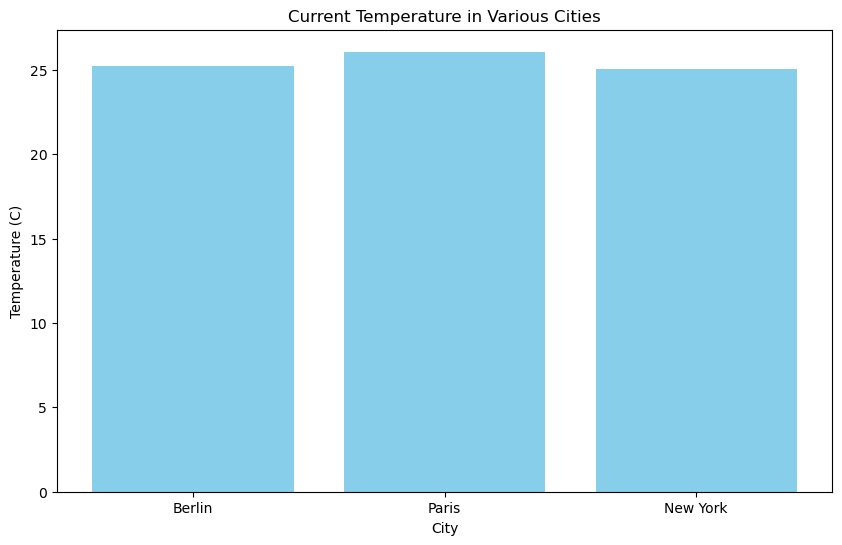

In [7]:


# Function to get weather data
def get_weather_data(city, api_key):
    base_url = 'http://api.openweathermap.org/data/2.5/weather?'
    complete_url = f'{base_url}q={city}&appid={api_key}'
    response = requests.get(complete_url)
    
    if response.status_code == 200:
        data = response.json()
        weather_data = {
            'City': data['name'],
            'Temperature (C)': data['main']['temp'] - 273.15,
            'Feels Like (C)': data['main']['feels_like'] - 273.15,
            'Min Temperature (C)': data['main']['temp_min'] - 273.15,
            'Max Temperature (C)': data['main']['temp_max'] - 273.15,
            'Pressure (hPa)': data['main']['pressure'],
            'Humidity (%)': data['main']['humidity'],
            'Weather Description': data['weather'][0]['description'],
            'Wind Speed (m/s)': data['wind']['speed'],
            'Wind Direction (degrees)': data['wind']['deg'],
            'Cloudiness (%)': data['clouds']['all'],
        }
        return weather_data
    else:
        print(f'Error: Status Code {response.status_code}')
        return None

api_key = 'MyAPI'

# List of cities
cities = ['Berlin', 'Paris', 'New York']

# Fetch and display weather data for each city
weather_data_list = []

for city in cities:
    data = get_weather_data(city, api_key)
    if data:
        weather_data_list.append(data)

# Create DataFrame from list of dictionaries
weather_df = pd.DataFrame(weather_data_list)

# Display the DataFrame
print(weather_df)

# Plot the temperatures
plt.figure(figsize=(10, 6))
plt.bar(weather_df['City'], weather_df['Temperature (C)'], color='skyblue')
plt.xlabel('City')
plt.ylabel('Temperature (C)')
plt.title('Current Temperature in Various Cities')
plt.show()


In [8]:
df

,City,Temperature (K),Feels Like (K),Min Temperature (K),Max Temperature (K),Pressure (hPa),Humidity (%),Weather Description,Wind Speed (m/s),Wind Direction (degrees),Cloudiness (%),Country,Sunrise,Sunset,Temperature (C),Feels Like (C),Min Temperature (C),Max Temperature (C),Daylight Duration
0,Berlin,298.37,298.17,295.93,300.36,1010,47,clear sky,1.54,0,0,DE,2024-06-24 02:44:00,2024-06-24 19:33:33,25.22,25.02,22.78,27.21,0 days 16:49:33


In [9]:
weather_df

,City,Temperature (C),Feels Like (C),Min Temperature (C),Max Temperature (C),Pressure (hPa),Humidity (%),Weather Description,Wind Speed (m/s),Wind Direction (degrees),Cloudiness (%)
0,Berlin,25.22,25.02,22.78,27.21,1010,47,clear sky,1.54,0,0
1,Paris,26.07,26.07,25.24,27.25,1019,48,clear sky,3.60,80,0
2,New York,25.05,25.28,23.18,26.31,1003,64,broken clouds,9.83,293,75
